<h3> Diabetes Prediction </h3>

Do you know how likely you are to develop diabetes? Well, it's time to find out!

With this diabetes prediction project, I'm on a mission to help you take control of your health and prevent diabetes before it's too late.

I've found a dataset on Kaggle that gathered data on people who have been diagnosed with diabetes and those who haven't, and I'm using fancy machine learning algorithms to uncover the secrets of this sneaky disease.

Not only will this analysis benefit you, but it will also help healthcare providers, researchers, and policymakers make informed decisions to combat the diabetes epidemic.

So, let's get excited about data and start predicting our way to better health!

In [125]:
#Importing the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [126]:
#Loading the dataset 
df = pd.read_csv('diabetes.csv')

<h4> I always like to view a quick snapshot of the dataset, view the size, description and info before analysizing the data </h4>

In [127]:
#viewing the top 5 rows and bottom 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [128]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [129]:
#checking the shape of the dataset 
df.shape

(768, 9)

This states that we have a dataset of 768 rows and 9 columns. This is helpful because we can decide if we can perform any machine learning model for prediction. If the dataset is small, it can challenging to train out data for accurate results

In [130]:
#Good idea to get an overview of the column names and its data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [131]:
print("\n")

In [132]:
#This line of code helps to get an understand of the distribution of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


I like to have a good understanding of distribution of the data. For example, based on the statistics, I can infer the following:
* The dataset contains 768 observations.
* A lot of columns have 0 as the minimum value
* The mean glucose level is 120.9, with a standard deviation of 31.97.
* The mean BMI is 31.99, with a standard deviation of 7.88.
* About 35% of the observations in the dataset are classified as having diabetes (Outcome = 1).

In [133]:
#The above line for df.info() shows all columns that have non values but I like to get a sum of any null values if they exist
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<h4> Once I have a clear picture of the dataset, I am ready to start creating visualization for analysis </h4>

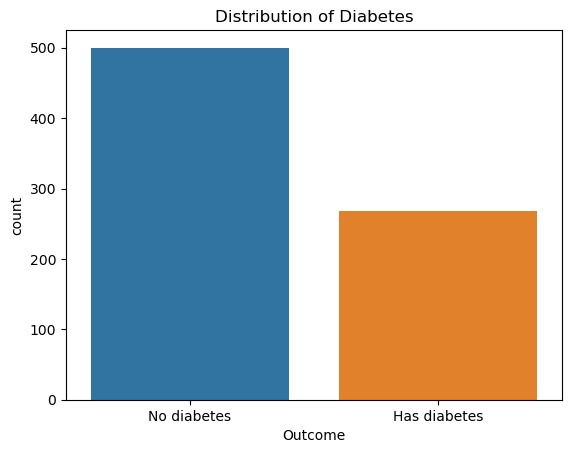

In [134]:
sns.countplot(data=df,x='Outcome')
plt.title('Distribution of Diabetes')
plt.xticks((0,1),('No diabetes','Has diabetes'))
plt.show()

<h3> Pairplot </h3>

I would strong suggest to do a pairplot of all the variables against each other to checkf for any obvious correlation between variables

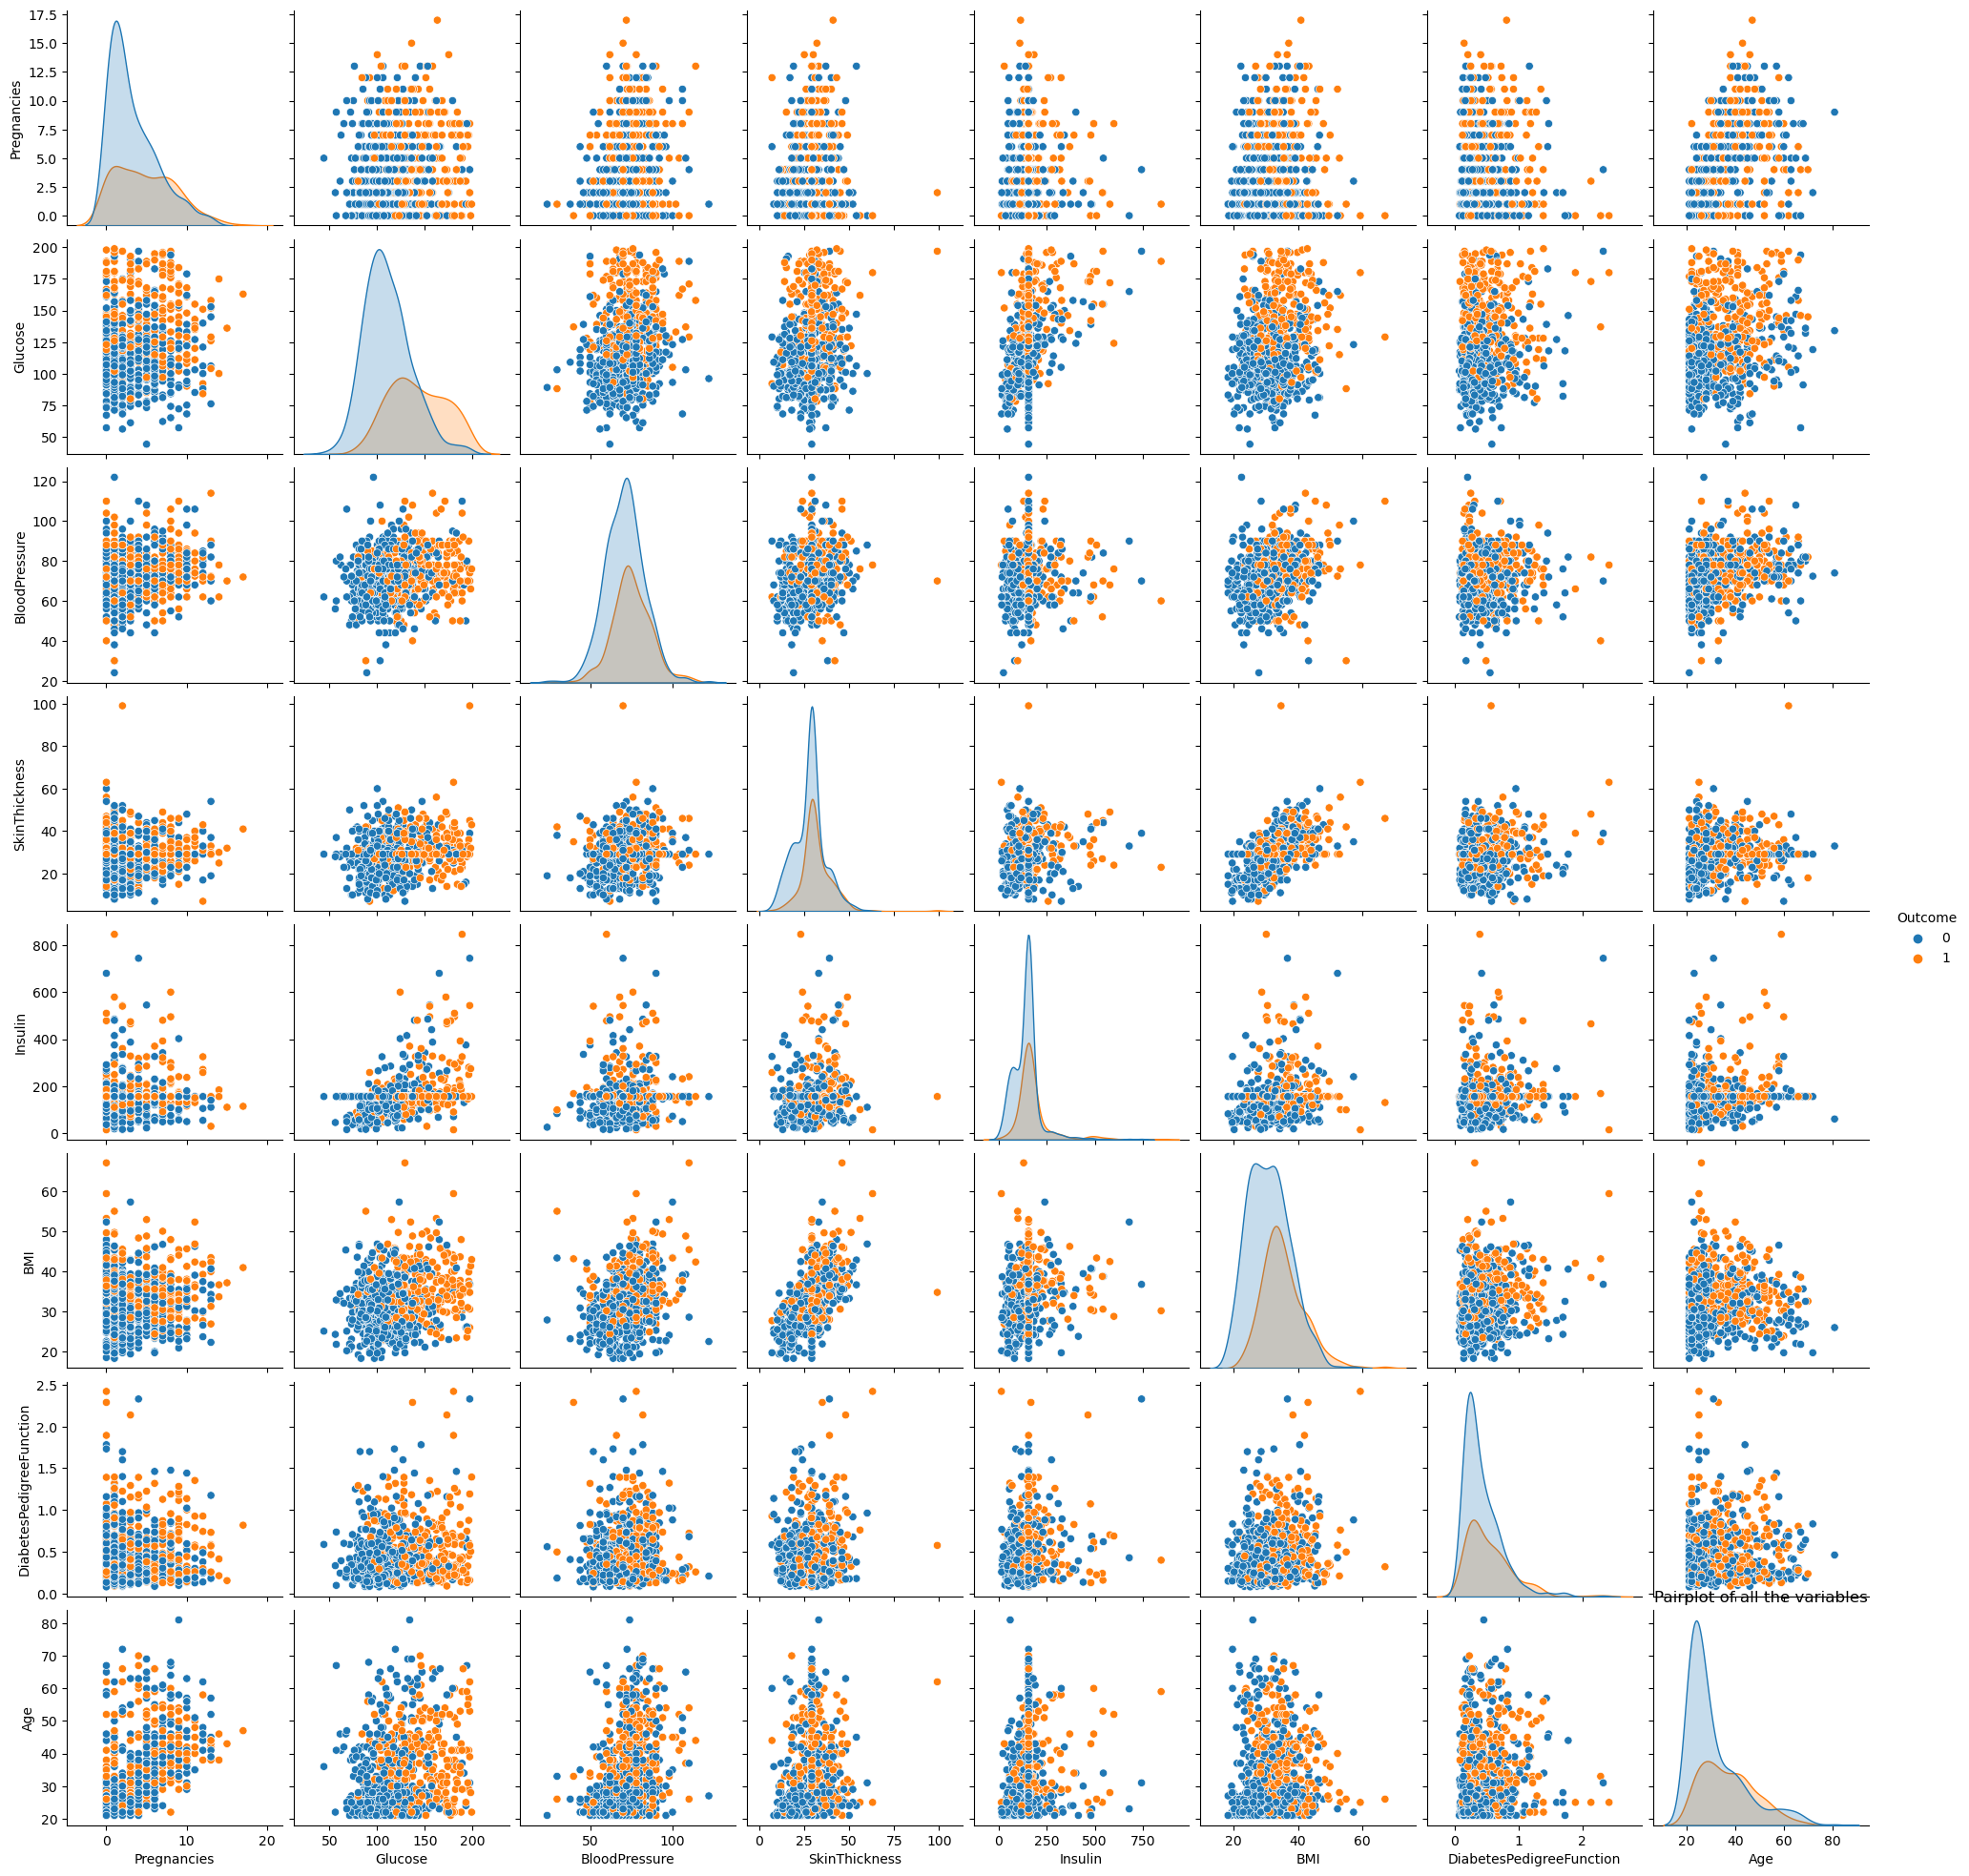

In [173]:
sns.pairplot(data=df,hue='Outcome')
# I differentiated the data by outcome to get a better picture of how each variable related to the outcome of where someone has diabetes or not
plt.title('Pairplot of all the variables')
plt.show()

From this plot, one can go through each individual plot and make some observation of the data. I personally like to do that so I get more comfortable with the dataset and get a solid hypothesis of the prediction before building my model

<h4> Key Observation from the pairplot </h4>

* The higher the Glucose measure is, the more likehood of someone having diabetes. Glucose value of about 150 is where the likehood of someone having diabetes is obvious
* BMI has seems to have a positive correlation with Outcome for some parts. A higher BMI value increases the likehood of someone having diabetes
* I would have thought that Age would be strong contributor to predicting diabetes but the data shows that is not completely obvious. The distribution of the outcome for diabetes isn't strongly correlated to Age 

Please note that I analyzed which variables contributed to predicting if someone is more likehood of having diabetes specifically. One can also notice correlation between other variables as well. For example, we can see a positive correlation between SkinThickness and BMI. 

One can also argue that there is a positive correlation between the Insulin and Glucose amount


<h3> Heatmap </h3>
This is another way of showing the relationship between variables. Heatmaps are great to pick out the strong correlations, weak correlationa and no correlation between variables, however, you can not conclude any information about the distribution or the target, in our case, likehood of someone having diabetes


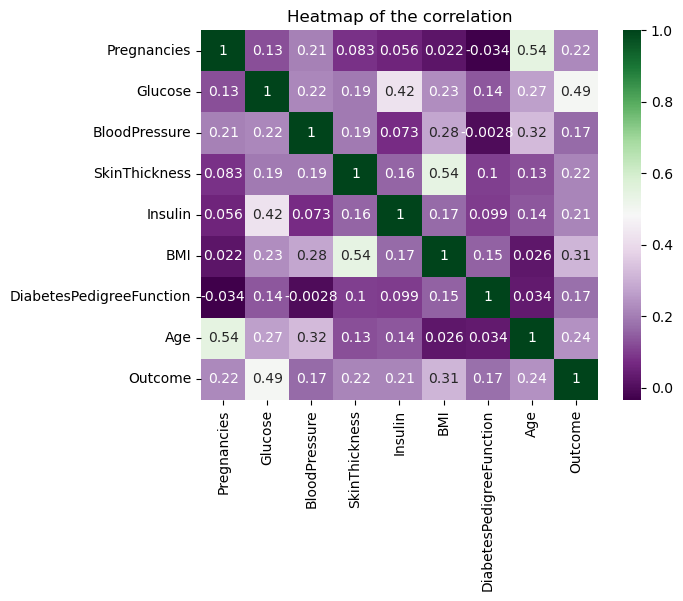

In [172]:
sns.heatmap(data=df.corr(),annot=True,cmap='PRGn')
plt.title('Heatmap of the correlation')
plt.show()

It's very helpful to choose a color scheme that visually aids in drawing relationships easily. I prefer using diverging colors to help separate negative and positive correlations at a glance.
    
    
That being said, we can notice that there aren't many strong positive correlations between variables, but rather more weak and negative correlations. This is not necessarily a bad thing, as it makes our analysis more interesting and engaging!

In [137]:
print("\n")

<h3> Data processing </h3>

Although when we checked the dataset for null values, we got 0 non values. However, when we looked at the statistics table above, we saw that most columns that minimum values of 0, and we cannot have a value of 0 for 
Preganices, Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age. Therefore, any columns with 0 can be treated as missing value (Null values)

So, I replaced the 0 with Null Values, to get a better measurement of the mean for each column, which we can then reaplace the missing values ( Null Values) with the corrected mean value.


In [138]:
#Replacing 0's with NaN. We need to specify the columns that we want to replace the 0 with Null because the outcome is a categorical value with 1's and 0's
dataset_new = df
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN) 
dataset_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<b> In the above head of the new dataset, you will notice that Insulin and SkinThickness now show NaN where the original dataset had 0 </b>


In [139]:
null_values=dataset_new.isnull().sum()
percentage_null_values=((null_values/dataset_new.shape[0])*100).round(1)
print(percentage_null_values)

Pregnancies                  0.0
Glucose                      0.7
BloodPressure                4.6
SkinThickness               29.6
Insulin                     48.7
BMI                          1.4
DiabetesPedigreeFunction     0.0
Age                          0.0
Outcome                      0.0
dtype: float64


In the table above, you can identify the column with the highest number of missing values and the percentage of missing data. Based on this information, you can decide whether to remove the column entirely or include it in your analysis. The decision can be based on the percentage of missing values and how you want to proceed with your analysis.

Based on the percentages of the missing values, I decided to replace the missing value with the mean of the respective column. Isulin column has a large percentage of missing values, which, depending on the type of dataset one is working with or depending on the significant of the specific variable, one can decide to either drop it and include it in their analysis. 
In our case, we saw that Insulin and SkinThickness were correlation to several variables, which would make  them an important preditor for our analysis for prediting diabetes. Therefore, I will include both the columns (Insulin, SkinThickness) to my dataframe and replace the missing values with their respective mean values.

For other columnss with relatively low missing percentage, replacing the NaN with mean of that column is a good approach in my opinion.



In [140]:
# Replacing missing values (NaN) with mean values of their specific column

dataset_new['Glucose'].fillna(dataset_new['Glucose'].mean(), inplace = True)
dataset_new['BloodPressure'].fillna(dataset_new['BloodPressure'].mean(), inplace = True)
dataset_new['SkinThickness'].fillna(dataset_new['SkinThickness'].mean(), inplace = True)
dataset_new['Insulin'].fillna(dataset_new['Insulin'].mean(), inplace = True)
dataset_new['BMI'].fillna(dataset_new['BMI'].mean(), inplace = True)

In [141]:
#Checking number of missing values after performing the data wrangling
dataset_new.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<h3> Now, we are in a good spot to begin our machine learning modelling to predict the outcome </h3>

The choice of machine learning technique to predict diabetes depends on the nature of the problem and the characteristics of the data. However, there are several techniques that are commonly used for binary classification problems like predicting whether a person has diabetes or not. Here are some examples that one can use for their analysis:

Logistic Regression: This is a common technique used for binary classification problems. Logistic regression models the probability of the outcome variable (diabetes) as a function of the predictor variables (such as age, BMI, glucose levels, etc.).

Decision Trees: Decision trees are another commonly used technique for classification problems. They work by partitioning the data into subsets based on the values of the predictor variables, and then recursively subdividing each subset into smaller subsets until a stopping criterion is met.

Random Forests: Random forests are an extension of decision trees that combine multiple decision trees to improve the accuracy of the predictions. They work by building a large number of decision trees on random subsets of the data, and then combining the predictions of the individual trees to generate a final prediction.

Support Vector Machines (SVMs): SVMs are a powerful technique for binary classification problems that work by finding a hyperplane in the data that maximally separates the two classes.

In our projectm we will perform all 4 of the techqniues mentioned above, and select the model that will give us the best result

<h3> Logistic Regression </h3>

In [142]:
# splitting the dataset into 2. One dataset will have all the variables that help to predict the outcome, and another dataset will only have the target,in this case the outcome column
y = dataset_new['Outcome'] # the target column
X = dataset_new.drop('Outcome', axis=1) # the variables to predict the outcome

In [143]:
#using train test split to divide the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = dataset_new['Outcome'] )

In [144]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
y_predict = model.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [145]:
# Confusion matrix for Logistics Regression
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_predict)
cm

array([[84, 16],
       [25, 29]])

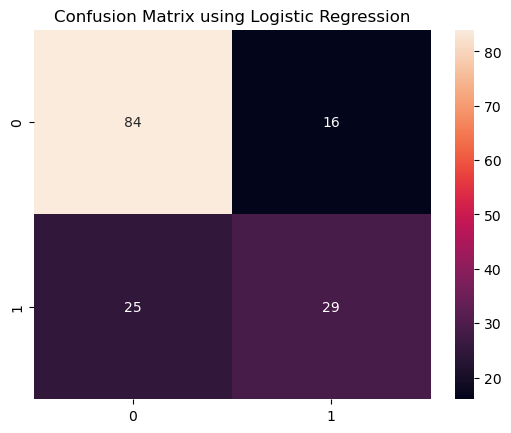

In [174]:
#Heatmap of the confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)
plt.title('Confusion Matrix using Logistic Regression')
plt.show()

In [147]:
from sklearn.metrics import accuracy_score
accuracy =accuracy_score(Y_test, y_predict)
accuracy

0.7337662337662337

Not the worst accuracy score or confusion matrix, but we can try using other ML techniques to compare the results

<h3> Decision Trees </h3>

In [148]:
from sklearn.tree import DecisionTreeClassifier

In [149]:
model2 = DecisionTreeClassifier()
model2.fit(X_train,Y_train)
y_predict2=model2.predict(X_test)
print(y_predict2)

[1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0]


In [150]:
cm2=confusion_matrix(Y_test,y_predict2)
cm2

array([[82, 18],
       [29, 25]])

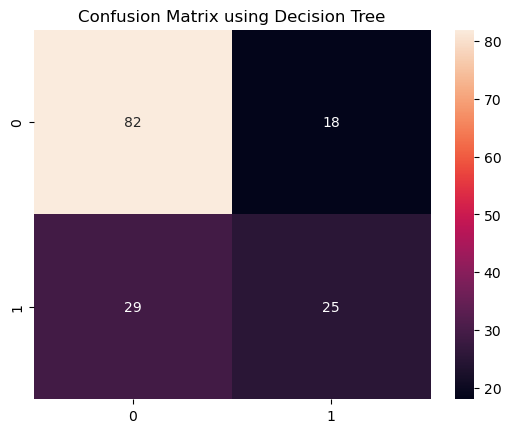

In [175]:
#Heatmap of the confusion matrix
sns.heatmap(pd.DataFrame(cm2), annot=True)
plt.title('Confusion Matrix using Decision Tree')
plt.show()

In [152]:
accuracy2 =accuracy_score(Y_test, predict2)
accuracy2

0.6753246753246753

The confusion matrix and accuracy score using Decision Tree decrease, therefore, Logistic Regression is currently the better choice. Let's try Random Forest

In [181]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(n_estimators=100)
model3.fit(X_train, Y_train)
y_predict3 = model3.predict(X_test)

# Print the predicted values
print(y_predict3)

[1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0
 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 1 0]


In [182]:
cm3=confusion_matrix(Y_test,y_predict3)
cm3

array([[84, 16],
       [22, 32]])

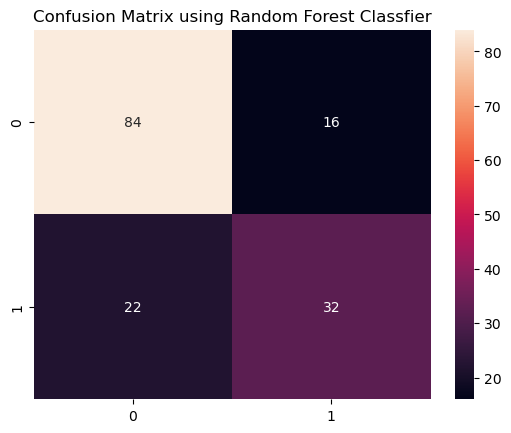

In [183]:
sns.heatmap(pd.DataFrame(cm3),annot=True)
plt.title('Confusion Matrix using Random Forest Classfier')
plt.show()

In [184]:
accuracy3=accuracy_score(Y_test,y_predict3)
accuracy3

0.7532467532467533

<b> Interesting! Random Forest Classifier had a better accuracy score! Let's try using Support Vector Machines

In [185]:
from sklearn.svm import SVC
model4=SVC(kernel='linear')
model4.fit(X_train,Y_train)

SVC(kernel='linear')

In [186]:
y_predict4=model4.predict(X_test)

In [187]:
print(y_predict4)

[1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1
 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 1 0]


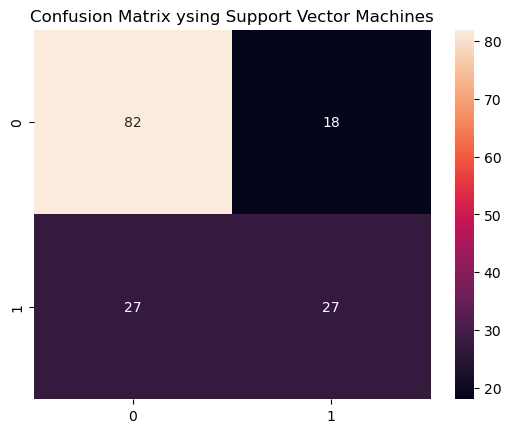

In [189]:
cm4=confusion_matrix(Y_test,y_predict4)
sns.heatmap(pd.DataFrame(cm4),annot=True)
plt.title('Confusion Matrix ysing Support Vector Machines')
plt.show()

In [161]:
accuracy4=accuracy_score(Y_test,y_predict4)
accuracy4

0.7077922077922078

In [162]:
print("\n")

In the end, we can conlude that Random Forest resulted in the best model because the confusion matrix and accurate score was the best compared to the rest of the models. That being said, let's use our model to check predict if a person has diabetes or not using some random values

In [169]:
y_predict3 = model3.predict([[0,172,72,35,79.799,33.6,0.627,50]])
if y_predict3==1:
    print("This patient is likely Diabetic")
else:
    print("This patient is likely Non Diabetic")

This patient is likely Diabetic
